#Building a Neural Network to  classify digits (MNIST)

In [17]:
import tensorflow as tf 
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt


x_train, x_test → images of handwritten digits (28x28 grayscale).

y_train, y_test → actual labels (0 to 9).

We divide by 255.0 to normalize pixel values between 0 and 1 (makes training easier and faster).

In [18]:
#Load Dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#Normalize the data to [0,1]
x_train , x_test = x_train / 255.0 , x_test /255.0

Sequential: builds the model layer by layer.

Flatten: changes the 2D image to a 1D vector.

Dense: fully connected layer.

ReLU: activation function for non-linearity.

Dropout: helps avoid overfitting.

Softmax: used in output layer to give probabilities for each digit.

In [19]:
#Building the Neural Network Model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),   # Convert 28x28 image to 1D array
    layers.Dense(128, activation='relu'),   # Hidden layer
    layers.Dropout(0.2),                    # Dropout for regularization
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


adam: an efficient optimizer for deep learning.

sparse_categorical_crossentropy: appropriate for multi-class classification.

accuracy: we want to monitor accuracy during training.

In [20]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


During each epoch, the model adjusts weights using backpropagation

In [21]:
#Train the model
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1467 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0891 - accuracy: 0.9731
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0756 - accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0663 - accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0575 - accuracy: 0.9814
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9827
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9836
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.044

In [22]:
#Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')


313/313 - 1s - loss: 0.0720 - accuracy: 0.9797 - 790ms/epoch - 3ms/step

Test accuracy: 0.98


x_test[0]: shows the first image in test data.

predictions[0]: probabilities for that image.

np.argmax(predictions[0]): picks the digit with the highest probability.

313/313 [==============================] - 1s 2ms/step


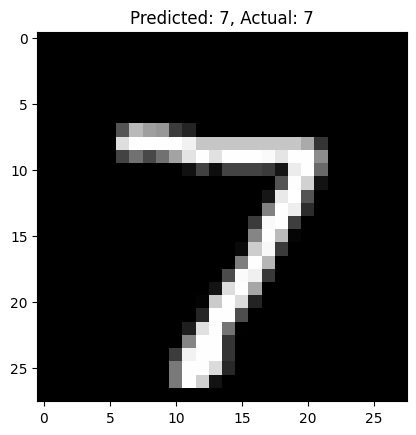

In [23]:
#Visualization
import numpy as np

predictions = model.predict(x_test)

# Show the first image and predicted label
plt.imshow(x_test[0], cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[0])}, Actual: {y_test[0]}')
plt.show()


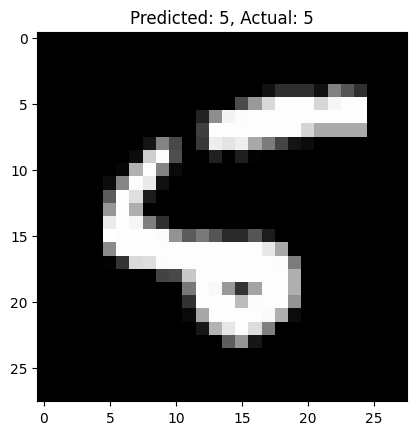

In [24]:
index = 8  # Change this to test a different digit

plt.imshow(x_test[index], cmap='gray')
plt.title(f'Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}')
plt.show()
